## 吴恩达机器学习习题六:支持向量机（寻找C和gamma）<br><br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
from sklearn.svm import SVC

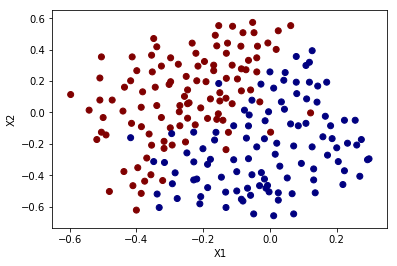

In [2]:
data = sio.loadmat('./data/ex6data3.mat')
X_train = data['X']  #(211,2)
y_train = data['y']  #(211,1)
X_val = data['Xval']  #(200,2)
y_val = data['yval']  #(200,1)
def plot_data(X,y):
    plt.scatter(X[:,0],X[:,1],c=y.flatten(),cmap='jet')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
plot_data(X_train,y_train)

In [3]:
Cvalues = [3, 10, 30, 100,0.01, 0.03, 0.1, 0.3,1 ]  #9
gammas =  [1 ,3, 10, 30, 100,0.01, 0.03, 0.1, 0.3]  #9
best_score = 0
best_params = (0,0)

#寻找最优C和gamma
for c in Cvalues:
        for gamma in gammas:
            svc1 = SVC(C=c,kernel='rbf',gamma=gamma)
            svc1.fit(X_train,y_train.flatten())
            score = svc1.score(X_val,y_val.flatten())
            if score > best_score:
                best_score = score
                best_params = (c,gamma)
print(best_score,best_params)

0.965 (3, 30)


In [4]:
svc2 = SVC(C=3,kernel='rbf',gamma=30)
svc2.fit(X_train,y_train.flatten())
svc2.predict(X_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=uint8)

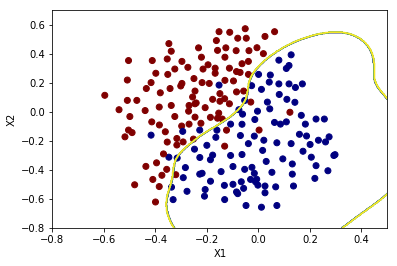

In [5]:
#画出最优下的决策边界
def plot_boundry(model):
    
    X1,X2 = np.meshgrid(np.linspace(-0.8,0.5,500),np.linspace(-0.8,0.7,500))
    z = np.c_[X1.flatten(),X2.flatten()]
    z = model.predict(z)
    zz = z.reshape(X1.shape)
    plt.contour(X1,X2,zz)    
    
plot_boundry(svc2)
plot_data(X_train,y_train)    